<a href="https://colab.research.google.com/github/amitbisht99/resume_project_challenge_1/blob/main/fact_aggregated_bookings_table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv ("/content/fact_aggregated_bookings.csv")

# **Data Exploration**

In [4]:
print (f"There are", df.shape[0], "rows in the dataset.")
print (f"There are", df.shape[1], "columns in the dataset.")

There are 9200 rows in the dataset.
There are 5 columns in the dataset.


In [6]:
print (f"The total size of dataset is", df.size, ".")

The total size of dataset is 46000 .


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   property_id          9200 non-null   int64 
 1   check_in_date        9200 non-null   object
 2   room_category        9200 non-null   object
 3   successful_bookings  9200 non-null   int64 
 4   capacity             9200 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 359.5+ KB


In [9]:
df.sample()

,property_id,check_in_date,room_category,successful_bookings,capacity
3728,17558,07-Jun-22,RT2,28,50


# **Data Cleaning**

## **Handling Missing Values**

In [11]:
# searching columns with missing values
if df.isna().any().any():
    print(f"Columns with missing values are -\n", df.columns[df.isna().any()].tolist())
else:
    print("No Columns with missing values found.")

No Columns with missing values found.


## **Handling Outliers**

### Column: property_id

In [13]:
# checking outliers
suspect_cols = ['property_id']
for col in suspect_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame using boolean indexing
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    if not outliers.empty:
        print(f"Outliers in {col}:\n{outliers}")
    else:
        print(f"No outliers found in {col}")

No outliers found in property_id


### Column: successful_booking

In [15]:
# checking outliers
suspect_cols = ['successful_bookings']
for col in suspect_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame using boolean indexing
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    if not outliers.empty:
        print(f"Outliers in {col}:\n{outliers}")
    else:
        print(f"No outliers found in {col}")

Outliers in successful_bookings:
      property_id check_in_date room_category  successful_bookings  capacity
12          16563     01-May-22           RT1                   36        41
27          17558     01-May-22           RT2                   38        50
31          19560     01-May-22           RT2                   37        38
32          16563     01-May-22           RT2                   37        38
33          16559     01-May-22           RT2                   35        41
...           ...           ...           ...                  ...       ...
7641        17563     16-Jul-22           RT2                   38        44
7645        18561     16-Jul-22           RT2                   38        40
7647        17560     16-Jul-22           RT2                   35        45
7741        17563     17-Jul-22           RT2                   35        44
9041        17563     30-Jul-22           RT2                   35        44

[124 rows x 5 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

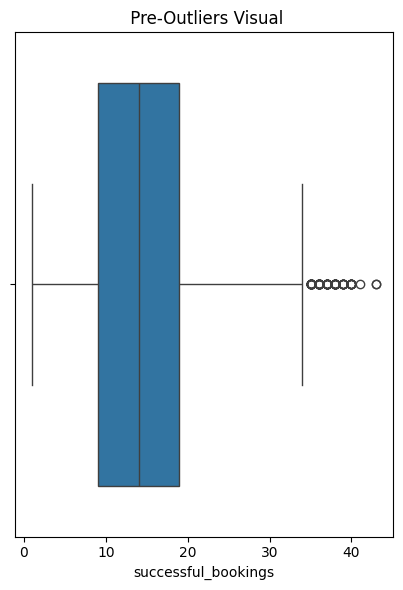

In [16]:
# visual of outliers pre-handling
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
sns.boxplot(x=df['successful_bookings'])

plt.title(" Pre-Outliers Visual")

plt.tight_layout()
plt.show

In [17]:
# removing outliers using IQR method
Q1 = df['successful_bookings'].quantile(0.25)
Q3 = df['successful_bookings'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['successful_bookings'] = np.clip(df['successful_bookings'], lower_bound, upper_bound)

In [18]:
# rechecking outliers
suspect_cols = ['successful_bookings']
for col in suspect_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame using boolean indexing
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    if not outliers.empty:
        print(f"Outliers in {col}:\n{outliers}")
    else:
        print(f"No outliers found in {col}")

No outliers found in successful_bookings


<function matplotlib.pyplot.show(close=None, block=None)>

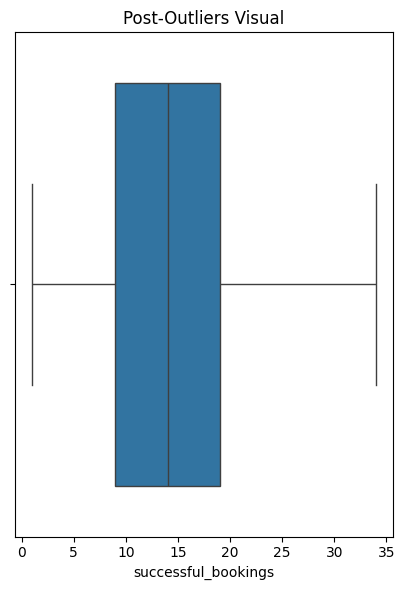

In [20]:
# visual of outliers post-handling
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
sns.boxplot(x=df['successful_bookings'])

plt.title("Post-Outliers Visual")

plt.tight_layout()
plt.show

### Column: capacity

In [21]:
# checking outliers
suspect_cols = ['capacity']
for col in suspect_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame using boolean indexing
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    if not outliers.empty:
        print(f"Outliers in {col}:\n{outliers}")
    else:
        print(f"No outliers found in {col}")

No outliers found in capacity


# **Checking Inconsistence**

In [22]:
df['check_in_date'] = df['check_in_date'].astype('datetime64[ns]')

In [24]:
df.dtypes

,0
property_id,int64
check_in_date,datetime64[ns]
room_category,object
successful_bookings,int64
capacity,int64


In [25]:
df.to_csv('fact aggregated bookings.csv', index = False)